## Log Likelihood Ratio Scores:

### Part of Speech tags and Bigrams

In [5]:
import pandas as pd
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns 
from collections import Counter
import random
import itertools

# Import general functions helpful for alignment
import SCP_Code as scp

# Import Log Likelihood Ratio functions
import FunctionsForLLR as llr

# Import code for Bigrams
import BigramCode as bi
from nltk.util import ngrams

In [6]:
# Run for twitter data for a-users and b-repliers
dataA = pd.read_csv('A_Tweets_Tagged.txt', sep='\t', header=None)
dataA.columns = ['Tokens', 'Tags', 'Conf','Raw Tweet']

dataB = pd.read_csv('B_Tweets_Tagged.txt', sep='\t', header=None)
dataB.columns = ['Tokens', 'Tags', 'Conf','Raw Tweet']

# Need to fill data before running counter
## When importing data again, need to fill blank tag data with 'B'
dataA.fillna({'Tags':'B'}, inplace=True)
dataB.fillna({'Tags':'B'}, inplace=True)

In [7]:
# Drop last row in dataA
dataA.drop(326167,axis = 0, inplace = True)

In [4]:
#Generate lists of counter items for part of speech tags

countdictA = []
for tags in dataA.Tags: 
    count = Counter(tags.split())
    #print(tags.split())
    countdictA.append(count)

    
countdictB = []
for tags in dataB.Tags: 
    count = Counter(tags.split())
    countdictB.append(count)
    
print(len(countdictA),len(countdictB))

326167 326167


In [5]:
# Set part of speech tags as markers

markerset = ['P','D','O','&','N','S','^','Z','L','M','V','A','R','!','T','X','Y','#','U','E','$',',','G']

# Run Code to calculate shared markers between countDictA and countDictB
sharedMarkers = scp.getSharedMarkers(countdictA,countdictB)

In [2]:
# Scramble replies in countdictB for random baseline

shuffledCountDictB = random.sample(countdictB,len(countdictB))
shuffledCountDictB[0]

In [3]:
#Get log likelihood ratio scores between the two tweet sets

LLRScores = llr.getLLR(countdictA,countdictB,sharedMarkers,markerset)
LLRScores

In [4]:
# remove 'M' from the markerset because it has zero frequency and is throwing a runtime warning. 
markerset.remove('M')
len(markerset)

In [13]:
# Get shared markers between the shuffled randomized tweetset 
sharedMarkersRand = scp.getSharedMarkers(countdictA,shuffledCountDictB)

In [5]:
# Calculate LLR scores for baseline with randomized tweetset
LLRScoresRand = llr.getLLR(countdictA,shuffledCountDictB,sharedMarkersRand,markerset)

In [23]:
LLRScoresDFT = pd.DataFrame.from_dict(LLRScores,orient = 'index')
LLRScoresDFT.columns = ['LLR Score']
LLRScoresDFT.head()

,LLR Score
P,4531.428761
D,2755.495254
O,1838.140835
&,1197.930326
N,2887.485555


In [22]:
LLRScoresDF = pd.DataFrame.from_dict(LLRScoresRand, orient='index')
LLRScoresDF.columns = ['LLR Baseline']
LLRScoresDF.head()

,LLR Baseline
P,0.218227
D,0.023083
O,0.384024
&,0.721100
N,0.082593


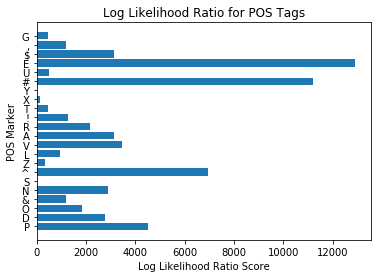

In [17]:
# Make visualization 
# Visualize dataframe to horizontal bar chart
plt.barh(range(len(LLRScores)), list(LLRScores.values()),align = 'center')#.plot(kind = 'barh',legend = False, color = 'steelblue',figsize = (15,10))
plt.yticks(range(len(LLRScores)),list(LLRScores.keys()))
plt.show

#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('Log Likelihood Ratio Score')
#plt.xlim(0.85,1.005)
plt.ylabel('POS Marker')
plt.title('Log Likelihood Ratio for POS Tags')
#figure(figsize=(20,20))
plt.savefig('LLR_POSTags')

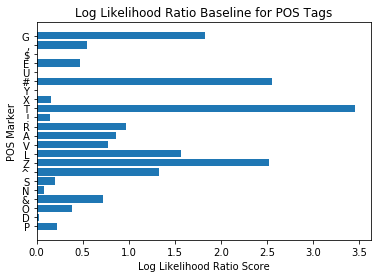

In [18]:
# Make visualization 
# Visualize dataframe to horizontal bar chart
plt.barh(range(len(LLRScoresRand)), list(LLRScoresRand.values()),align = 'center')#.plot(kind = 'barh',legend = False, color = 'steelblue',figsize = (15,10))
plt.yticks(range(len(LLRScoresRand)),list(LLRScoresRand.keys()))
plt.show

#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('Log Likelihood Ratio Score')
#plt.xlim(0.85,1.005)
plt.ylabel('POS Marker')
plt.title('Log Likelihood Ratio Baseline for POS Tags')
#figure(figsize=(20,20))
plt.savefig('LLR_POSTags_rand')

In [24]:
LLRScoresDF=LLRScoresDF.join(LLRScoresDFT)
LLRScoresDF.head()

,LLR Baseline,LLR Score
P,0.218227,4531.428761
D,0.023083,2755.495254
O,0.384024,1838.140835
&,0.721100,1197.930326
N,0.082593,2887.485555


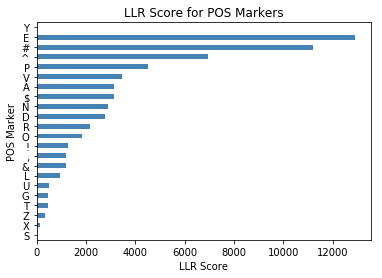

In [32]:
# Visualize dataframe to horizontal bar chart
plot1 = LLRScoresDF['LLR Score'].sort_values().plot(kind = 'barh', stacked = True, color = 'SteelBlue')#,figsize = (20,10))
                    
#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('LLR Score')
plt.ylabel('POS Marker')
plt.title('LLR Score for POS Markers')
plt.savefig('LLRScoreSortedPOS')

In [20]:
with open ('LLR_POSTags_scores_Update.tex','w') as tf:
    tf.write(LLRScoresDF.to_latex())

In [ ]:
plot1 = LLRScoresDF.plot(kind = 'barh', stacked = True,figsize = (20,10))                    
#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('LLR Score')
plt.ylabel('Part of Speech Marker')
plt.title('LLR - Log Likelihood Ratio')
plt.savefig('LogLikelihood_baseline_and_Test')

### Examine probability values for POS tags to determine if there is alignment or disalignment. 

In [33]:
investigationSet = {}
for marker in markerset:
    allMarkerInstancesB = llr.countMarkers(marker,countdictB)
    k1 = llr.countMarkers(marker,sharedMarkers)
    k2 = allMarkerInstancesB - k1
    n1 = llr.countMarkers(marker,countdictA)
    n2 = len(countdictA) - n1
    p1 = k1/n1
    p2 = k2/n2
    p = (k1+k2)/(n1+n2)
    investigationSet[marker] = [p,p1,p2]

In [34]:
investigationSet

{'P': [0.674516428700635, 0.711314801695042, 0.589975332605443],
 'D': [0.6161904791103944, 0.6498918086428341, 0.5565313402412094],
 'O': [0.6703467855423755, 0.6941221912918393, 0.6172892103438027],
 '&': [0.28526184439259644, 0.32944428057986214, 0.2680242767274153],
 'N': [0.7919930587705072, 0.8106423849507387, 0.7086317060490701],
 'S': [0.005687270631302369, 0.017848289538919187, 0.005611599568101188],
 '^': [0.28577691795920496, 0.3831734543435388, 0.23989121070934044],
 'Z': [0.012321908715473975, 0.05264331920588891, 0.011759988062819414],
 'L': [0.2799670107644244, 0.31977464788732396, 0.26508632490512474],
 'V': [0.8486112942143135, 0.8637220955437322, 0.7463258938141629],
 'A': [0.5995762906731827, 0.6388687343518471, 0.5406302459814345],
 'R': [0.5882170789810128, 0.6222133233572373, 0.5409077577357384],
 '!': [0.28532316267433555, 0.33533828968505996, 0.2689879853253398],
 'T': [0.07344397195301794, 0.10964748767656683, 0.07055021753094104],
 'X': [0.01971382757912358, 0

In [35]:
InvestDF = pd.DataFrame.from_dict(investigationSet, orient='index')
InvestDF.columns = ['P: p(B)', 'P1: p(B|A)', 'P2: p(B|~A)']
InvestDF

,P: p(B),P1: p(B|A),P2: p(B|~A)
P,0.674516,0.711315,0.589975
D,0.616190,0.649892,0.556531
O,0.670347,0.694122,0.617289
&,0.285262,0.329444,0.268024
N,0.791993,0.810642,0.708632
S,0.005687,0.017848,0.005612
^,0.285777,0.383173,0.239891
Z,0.012322,0.052643,0.011760
L,0.279967,0.319775,0.265086
V,0.848611,0.863722,0.746326


In [80]:
investigationSetRand = {}
for marker in markerset:
    allMarkerInstancesB = llr.countMarkers(marker,shuffledCountDictB)
    k1 = llr.countMarkers(marker,sharedMarkersRand)
    k2 = allMarkerInstancesB - k1
    n1 = llr.countMarkers(marker,countdictA)
    n2 = len(countdictA) - n1
    p1 = k1/n1
    p2 = k2/n2
    p = (k1+k2)/(n1+n2)
    investigationSetRand[marker] = [p,p1,p2]

In [81]:
investigationSetRand

{'P': [0.674516428700635, 0.6747693079458397, 0.6739354603906345],
 'D': [0.6161904791103944, 0.6162877170424177, 0.6160183455070495],
 'O': [0.6703467855423755, 0.6700053721191456, 0.6711086891905281],
 '&': [0.28526184439259644, 0.2863369711270606, 0.28484238880270046],
 'N': [0.7919930587705072, 0.7920896832721789, 0.7915611531301884],
 'S': [0.005687270631302369, 0.00495785820525533, 0.005691809347524294],
 '^': [0.28577691795920496, 0.28445057154345454, 0.2864017897011001],
 'Z': [0.012321908715473975, 0.009814856123131831, 0.012356847092177416],
 'L': [0.2799670107644244, 0.27835492957746477, 0.28056963064986923],
 'V': [0.8486112942143135, 0.8488232975818484, 0.8471762380010956],
 'A': [0.5995762906731827, 0.6002248224413673, 0.5986033712257679],
 'R': [0.5882170789810128, 0.5874954554316154, 0.5892212934447866],
 '!': [0.28532316267433555, 0.2847909739604737, 0.2854969780286823],
 'T': [0.07344397195301794, 0.07646742057081314, 0.0732023070861449],
 'X': [0.01971382757912358, 0

In [37]:
investSetRandDF=pd.DataFrame.from_dict(investigationSetRand, orient='index')
investSetRandDF.columns = ['P: p(B)', 'P1: p(B|A)', 'P2: p(B|~A)']
investSetRandDF

,P: p(B),P1: p(B|A),P2: p(B|~A)
P,0.674516,0.674769,0.673935
D,0.616190,0.616288,0.616018
O,0.670347,0.670005,0.671109
&,0.285262,0.286337,0.284842
N,0.791993,0.792090,0.791561
S,0.005687,0.004958,0.005692
^,0.285777,0.284451,0.286402
Z,0.012322,0.009815,0.012357
L,0.279967,0.278355,0.280570
V,0.848611,0.848823,0.847176


# Bigrams


In [8]:
bigramsA = bi.AllBigramsinTweetset(dataA.Tags)

bigramsB = bi.AllBigramsinTweetset(dataB.Tags)

In [9]:
tupleBigramsA = bi.convertToTuples(bigramsA)
tupleBigramsB = bi.convertToTuples(bigramsB)

In [ ]:
print('A Bigrams: ',tupleBigramsA[0:2],'\n B Bigrams: ',tupleBigramsB[0:2])

In [ ]:
# Scramble replies in tupleBigramsB for random 

shuffledB = random.sample(tupleBigramsB,len(tupleBigramsB))
print(shuffledB[0:2])

In [ ]:
# First make list of lists by flattening: 

singleListBigramsA = [y for x in tupleBigramsA for y in x]
len(singleListBigramsA)

In [ ]:
# Make single list of bigrams for b_tweets
singleListBigramsB = [y for x in tupleBigramsB for y in x]
len(singleListBigramsB)

In [15]:
bigramsFreqA = Counter(singleListBigramsA)
bigramsFreqB = Counter(singleListBigramsB)

# Set the topBigrams to use as markers
totalBigramFreq = bigramsFreqB+bigramsFreqA
topBigrams = totalBigramFreq.most_common(50)
topBigrams[0:10]

[(('O', 'V'), 339790),
 (('N', ','), 329800),
 (('D', 'N'), 304439),
 (('V', 'O'), 223508),
 (('N', 'P'), 221975),
 (('A', 'N'), 217495),
 (('V', 'V'), 217285),
 (('V', 'P'), 212797),
 (('V', 'D'), 206326),
 (('P', 'D'), 185236)]

In [17]:
sharedBigAB = scp.getSharedMarkers(tupleBigramsA,tupleBigramsB)
sharedBigARand = scp.getSharedMarkers(tupleBigramsA,shuffledB)

In [51]:
print('Length Shared: ',len(sharedBigAB), 'Length Shared Rand: ',len(sharedBigARand))

Length Shared:  326167 Length Shared Rand:  326167


In [60]:
topBigrams[0][0]

('O', 'V')

In [16]:
topBigramsOnly = [item[0] for item in topBigrams]
topBigramsOnly[0]

('O', 'V')

In [19]:
# Run LLR on bigrams

LLRBigrams = llr.getLLR(tupleBigramsA,tupleBigramsB,sharedBigAB,topBigramsOnly)

In [22]:
# Generate scores for shuffled bigram markers:
LLRBigramRand = llr.getLLR(tupleBigramsA,shuffledB,sharedBigARand,topBigramsOnly)
#LLRBigramRand

In [21]:
LLRBigramsDF = pd.DataFrame.from_dict(LLRBigrams, orient='index')
LLRBigramsDF.columns = ['LLR Scores']
LLRBigramsDF.head()

,LLR Scores
"(O, V)",2151.176931
"(N, ,)",1656.259056
"(D, N)",1771.475619
"(V, O)",539.544914
"(N, P)",2041.216877


In [25]:
LLRLargest = LLRBigramsDF.nlargest(20,'LLR Scores')
LLRLargest

,LLR Scores
"(N, V)",2216.438612
"(O, V)",2151.176931
"(P, ^)",2126.012682
"(N, P)",2041.216877
"(^, ,)",1901.958398
"(V, V)",1892.477193
"(,, E)",1814.874628
"(A, N)",1808.164780
"(D, N)",1771.475619
"(N, ,)",1656.259056


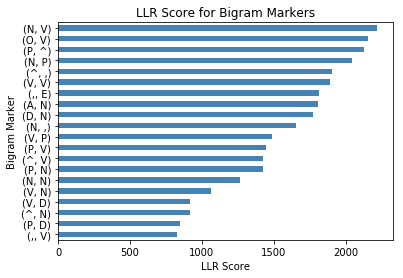

In [26]:
# Visualization for LLR Scores Bigrams
# Only plot top 2 for ease of viewing
plot1 = LLRLargest['LLR Scores'].sort_values().plot(kind = 'barh', stacked = True, color = 'SteelBlue')#,figsize = (20,10))
                    
#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('LLR Score')
plt.ylabel('Bigram Marker')
plt.title('LLR Score for Bigram Markers')
plt.savefig('LLR_Bigrams_top20')

In [66]:
LLRBigramRandDF = pd.DataFrame.from_dict(LLRBigramRand, orient='index')
LLRBigramRandDF.columns = ['LLR Baseline']
LLRBigramRandDF.head()

,LLR Baseline
"(O, V)",0.662844
"(N, ,)",1.356804
"(D, N)",0.022500
"(V, O)",0.010504
"(N, P)",0.217582


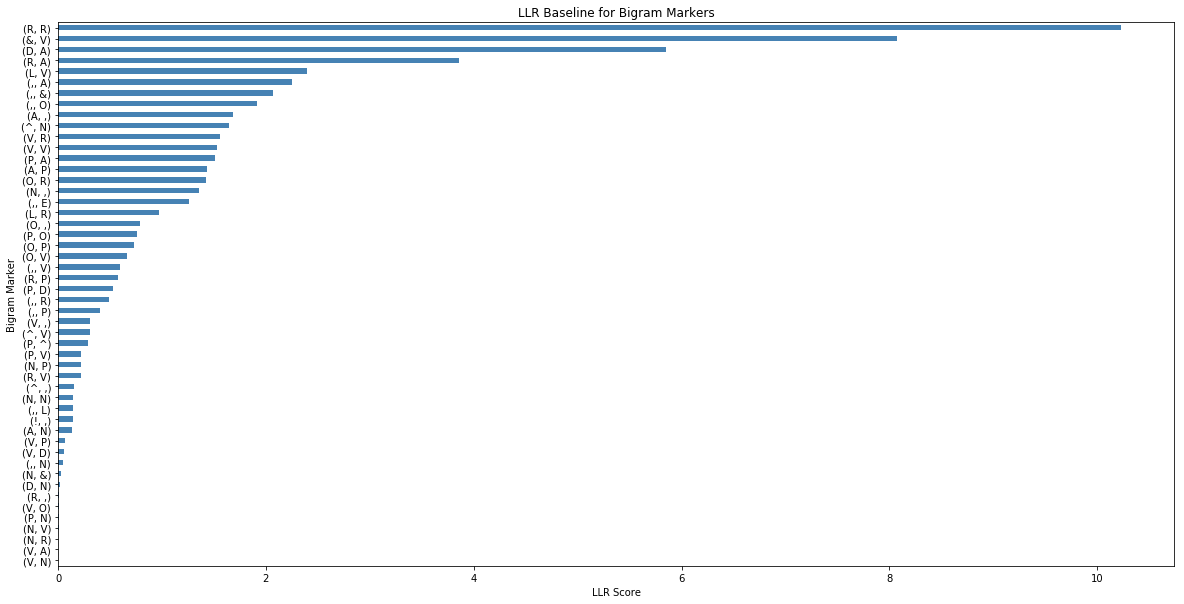

In [67]:
# Visualization for LLR Scores Bigrams
# Visualize dataframe to horizontal bar chart
plot1 = LLRBigramRandDF['LLR Baseline'].sort_values().plot(kind = 'barh', stacked = True, color = 'SteelBlue',figsize = (20,10))
                    
#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('LLR Score')
plt.ylabel('Bigram Marker')
plt.title('LLR Baseline for Bigram Markers')
plt.savefig('LLRScoreSorted_Bigrams_RandShuffled')

In [69]:
LLRBigramRandDF=LLRBigramRandDF.join(LLRBigramsDF)
LLRBigramRandDF

,LLR Baseline,LLR Scores
"(O, V)",0.662844,2151.176931
"(N, ,)",1.356804,1656.259056
"(D, N)",0.022500,1771.475619
"(V, O)",0.010504,539.544914
"(N, P)",0.217582,2041.216877
"(A, N)",0.138028,1808.164780
"(V, V)",1.530219,1892.477193
"(V, P)",0.062379,1486.755324
"(V, D)",0.060948,918.066172
"(P, D)",0.525265,847.075315


In [74]:
with open ('LLR_BigramScores_WithDiff.tex','w') as tf:
    tf.write(LLRBigramRandDF.to_latex())

In [72]:
LLRBigramRandDF['Score Difference'] = LLRBigramRandDF['LLR Scores'] - LLRBigramRandDF['LLR Baseline']

In [73]:
LLRBigramRandDF

,LLR Baseline,LLR Scores,Score Difference
"(O, V)",0.662844,2151.176931,2150.514087
"(N, ,)",1.356804,1656.259056,1654.902252
"(D, N)",0.022500,1771.475619,1771.453119
"(V, O)",0.010504,539.544914,539.534410
"(N, P)",0.217582,2041.216877,2040.999296
"(A, N)",0.138028,1808.164780,1808.026752
"(V, V)",1.530219,1892.477193,1890.946974
"(V, P)",0.062379,1486.755324,1486.692945
"(V, D)",0.060948,918.066172,918.005224
"(P, D)",0.525265,847.075315,846.550050


### Investigation of frequencies

In [82]:
# tupleBigramsA,tupleBigramsB,sharedBigAB,topBigramsOnly
# tupleBigramsA,shuffledB,sharedBigARand,topBigramsOnly

investBigram = {}
for marker in topBigramsOnly:
    allMarkerInstancesB = llr.countMarkers(marker,tupleBigramsB)
    k1 = llr.countMarkers(marker,sharedBigAB)
    k2 = allMarkerInstancesB - k1
    n1 = llr.countMarkers(marker,tupleBigramsA)
    n2 = len(tupleBigramsA) - n1
    p1 = k1/n1
    p2 = k2/n2
    p = (k1+k2)/(n1+n2)
    investBigram[marker] = [p,p1,p2]

investBigramRand = {}
for marker in topBigramsOnly:
    allMarkerInstancesB = llr.countMarkers(marker,shuffledB)
    k1 = llr.countMarkers(marker,sharedBigARand)
    k2 = allMarkerInstancesB - k1
    n1 = llr.countMarkers(marker,tupleBigramsA)
    n2 = len(tupleBigramsA) - n1
    p1 = k1/n1
    p2 = k2/n2
    p = (k1+k2)/(n1+n2)
    investBigramRand[marker] = [p,p1,p2]

In [83]:
investBigram

{('O', 'V'): [0.5135559391354736, 0.5518994689032708, 0.47062684394536075],
 ('N', ','): [0.49329024702069796, 0.527651638495012, 0.4563848863679719],
 ('D', 'N'): [0.4590010638721882, 0.49764748461816866, 0.4241216992632948],
 ('V', 'O'): [0.3266854096214516, 0.3522667031482463, 0.3123849856366478],
 ('N', 'P'): [0.33425515150214463, 0.38578334159643035, 0.306957765635626],
 ('A', 'N'): [0.32887447227953776, 0.3780924818783057, 0.3037510419560989],
 ('V', 'V'): [0.33794344614875205, 0.3897663904949607, 0.3126220859119703],
 ('V', 'P'): [0.32165424460475767, 0.36675503318379, 0.29936367009799203],
 ('V', 'D'): [0.30890310791710995, 0.34451369681354904, 0.2918606496067454],
 ('P', 'D'): [0.27846164694772924, 0.3145078433657095, 0.2637774210807919],
 ('P', 'V'): [0.22914641885905074, 0.28130817340529535, 0.213659750773366],
 ('R', 'V'): [0.210750934337318, 0.2408141235956652, 0.20247497654050672],
 ('N', 'V'): [0.2091750544966229, 0.27457295272686, 0.19114684981011643],
 (',', 'V'): [0.2

In [84]:
InvestBigDF = pd.DataFrame.from_dict(investBigram, orient='index')
InvestBigDF.columns = ['P: p(B)', 'P1: p(B|A)', 'P2: p(B|~A)']

InvestBigRandDF = pd.DataFrame.from_dict(investBigramRand, orient='index')
InvestBigRandDF.columns = ['Pr: p(B)', 'Pr1: p(B|A)', 'Pr2: p(B|~A)']

InvestBigRandDF=InvestBigRandDF.join(InvestBigDF)
InvestBigRandDF

,Pr: p(B),Pr1: p(B|A),Pr2: p(B|~A),P: p(B),P1: p(B|A),P2: p(B|~A)
"(O, V)",0.513556,0.514229,0.512802,0.513556,0.551899,0.470627
"(N, ,)",0.493290,0.492306,0.494347,0.493290,0.527652,0.456385
"(D, N)",0.459001,0.458863,0.459125,0.459001,0.497647,0.424122
"(V, O)",0.326685,0.326573,0.326748,0.326685,0.352267,0.312385
"(N, P)",0.334255,0.333726,0.334536,0.334255,0.385783,0.306958
"(A, N)",0.328874,0.329302,0.328656,0.328874,0.378092,0.303751
"(V, V)",0.337943,0.336478,0.338659,0.337943,0.389766,0.312622
"(V, P)",0.321654,0.321364,0.321798,0.321654,0.366755,0.299364
"(V, D)",0.308903,0.309192,0.308765,0.308903,0.344514,0.291861
"(P, D)",0.278462,0.279353,0.278099,0.278462,0.314508,0.263777


In [85]:
with open ('BigramLLR_Investigation_Probs.tex','w') as tf:
    tf.write(InvestBigRandDF.to_latex())

### Generate frequency counts of shared markers for further investigation

#### POS tags

In [ ]:
# Flatten shared lists of POS tags:
flat_share = [item for sublist in sharedMarkers for item in sublist]
flat_shuff = [item for sublist in sharedMarkersRand for item in sublist]
print(len(flat_share),len(flat_shuff))

In [ ]:
counterShared = Counter(flat_share)
counterRandShuf = Counter(flat_shuff)

print(counterShared)
print('\n',counterRandShuf)

In [ ]:
countershareddf = pd.DataFrame.from_dict(counterShared,orient='index')
dtemp = pd.DataFrame.from_dict(counterRandShuf,orient='index')
dtemp.columns = ['Shared Rand']
countershareddf.columns = ['Shared']
countershareddf['Rand Shared'] = dtemp['Shared Rand']

In [ ]:
countershareddf['Difference'] = countershareddf['Shared'] - countershareddf['Rand Shared']
countershareddf

In [ ]:
# Compare frequencies of markers 
countersharedDF = pd.DataFrame(counterShared)
dTemp = pd.DataFrame(counterRandShuf)

dTemp.columns = ['POS','Shared Rand']
countersharedDF.columns = ['POS','Shared']

shareComp = pd.merge(countersharedDF, dTemp, on='POS')
shareComp['Difference'] = shareBigramComp['Shared'] - shareBigramComp['Shared Rand']
shareComp

In [ ]:
print(countershareddf.sum())

In [ ]:
with open ('SharedPOSFreq.tex','w') as tf:
    tf.write(countershareddf.to_latex())

#### Bigrams

In [ ]:
# Flatten shared lists to generate frequency counts for all bigrams:
flat_shareBi = [item for sublist in sharedBigAB for item in sublist]
flat_shuffBi = [item for sublist in sharedBigARand for item in sublist]
print(len(flat_shareBi),len(flat_shuffBi))

counterSharedBi = Counter(flat_share)
counterRandShufBi = Counter(flat_shuff)

print(len(counterSharedBi))
print(len(counterRandShufBi))

In [ ]:
topS = counterShared.most_common(50)
topR = counterRandShuf.most_common(50)

In [ ]:
countersharedDF = pd.DataFrame(topS)
dTemp = pd.DataFrame(topR)

dTemp.columns = ['Bigram','Shared Rand']
countersharedDF.columns = ['Bigram','Shared']

shareBigramComp = pd.merge(countersharedDF, dTemp, on='Bigram')
shareBigramComp['Difference'] = shareBigramComp['Shared'] - shareBigramComp['Shared Rand']
shareBigramComp

In [ ]:
print(shareBigramComp.sum())
with open ('SharedBigFreq_Edit.tex','w') as tf:
    tf.write(shareBigramComp.to_latex())